In [73]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
from scipy import stats
from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['font.sans-serif']=['Microsoft Yahei']
plt.style.use("ggplot")
import pretty_errors
%matplotlib inline

<div class="jumbotron">
    <h1 class="display-1">数据分析</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

> **数据分析的层次**
<center><img src="./img/analysis/analysisHierachy.svg" width=100%></center>

## 数据描述性分析

### 数据基本描述

<center><img src="./img/analysis/chipotle.jpg" width=60%></center>

#### 将数据集存入一个名为chipo的数据框内

In [3]:
chipo = pd.read_csv('./data/analysis/chipotle.csv')

#### 查看前10行内容

In [4]:
chipo.head(10)    

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 数据集中有多少个列(columns)

In [5]:
chipo.shape[1]

5

#### 显示全部列名

In [6]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### 显示数据集的索引

In [7]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### 顾客最爱点哪个商品（item)？

In [8]:
ordered = chipo.groupby(by='item_name').agg({'quantity':'sum'})
ordered.head()
ordered.sort_values(by='quantity',ascending=False)

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


#### 顾客总共买了多少种商品（item)？

In [9]:
ordered.shape[0]

50

#### 下单总量是多少？

In [10]:
ordered['quantity'].sum()

4972

#### 将item_price转换为浮点数(float)

In [11]:
chipo.head()
chipo['item_price'] = chipo['item_price'].map(lambda x: float(x[1:]))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 在该数据集对应的时期内，该chipotle门店的收入是多少?

##### 新增一列`sub_total`计算每个order的收入

In [12]:
chipo['sub_total'] = chipo['item_price']*chipo['quantity']
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,sub_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


##### 计算所有`sub_total`的总和

In [13]:
chipo['sub_total'].sum()

39237.02

#### 该chipotle门店一共有多少订单？

```python
Series.unique()
```
- 返回`Series`中的独特元素构成的数组

```python
Series.nunique(dropna=True)
```
- 计算`Series`中独特元素的个数，默认不计算空值

In [14]:
chipo['order_id'].nunique()

1834

#### 每一单(order)对应的平均总价是多少？

In [15]:
chipo.groupby(by='order_id').agg({'sub_total':'sum'}).mean()

sub_total    21.394231
dtype: float64

### 数据可视化展示

<center><img src="./img/analysis/titanic.jpg" width=60%></center>

#### 读入数据

In [42]:
titanicDf = pd.read_csv('./data/analysis/train.csv')
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


列名|含义
---|---
PassengerId|乘客ID
Survived|遇难0，生存1
Pclass|船票等级
SibSp|同在船上的兄弟姐妹和配偶人数
Parch|同在船上的父母和子女人数
Ticket|船票号码
Fare|船票价格
Cabin|船舱号码
Embarked|登船港口

#### 识别每个属性的类型

属性|类型
---|---
PassengerId|序列
Survived|标称
Pclass|序列
Name|标称
Sex|标称
Age|比率
SibSp|比率
Parch|比率
Ticket|标称
Fare|比率
Cabin|标称
Embarked|标称

#### 有无重复信息？共有多少乘客？

In [4]:
titanicDf.duplicated().unique()
titanicDf.shape[0]

array([False])

891

#### 将PassengerId设为索引

In [5]:
titanicDf.set_index('PassengerId',inplace=True)
titanicDf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### `DataFrame`建立索引
```python
DataFrame.set_index(keys, drop=True, inplace=False)
```
- 用1个或多个列，或者名称列表给`DataFrame`设置索引（行名）
- `keys`：可以是单个列列名、由名称构成的列表、`Series`（长度与`DataFrame`的行数一样），或者是前述形式的各种组合
- `drop`：是否将设置为索引的列从`DataFrame`中删除，默认删除

In [6]:
idxDf = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})
idxDf

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


In [7]:
idxDf.set_index('month')

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [8]:
idxDf.set_index(['year','month'])

,,sale
year,month,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


In [9]:
idxDf.set_index([[1,2,3,4] ,'year'])

,,month,sale
,year,,
1,2012,1,55
2,2014,4,40
3,2013,7,84
4,2014,10,31


#### 用饼图展示船票等级及比例

- 有多少个船票等级？分别是什么？每个等级多少乘客？

In [10]:
titanicDf['Pclass'].nunique()
titanicDf['Pclass'].unique()
classSe = titanicDf['Pclass'].value_counts()
classSe

3

array([3, 1, 2])

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### 更改索引名称
```python
    Series.rename(index=None, inplace=False)
```
- 更改`Series`的索引名称
- `index`：可以是字典、函数

In [11]:
s = pd.Series([100, 200, 300])
s
s.rename({0:'one',2:'three'})
s.rename(lambda x: x**2)

0    100
1    200
2    300
dtype: int64

one      100
1        200
three    300
dtype: int64

0    100
1    200
4    300
dtype: int64

In [12]:
classSe
classSe.rename({3:'普通',1:'高级',2:'中级'},inplace=True)
classSe

3    491
1    216
2    184
Name: Pclass, dtype: int64

普通    491
高级    216
中级    184
Name: Pclass, dtype: int64

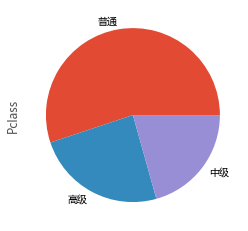

In [13]:
classSe.plot(kind='pie')

#### `pandas`绘图
```python
Series.plot(*args)
DataFrame.plot(x,y,*args)
```
- `kind`：绘图样式类型
    + `line`：线条图
    + `bar`：纵向柱状图
    + `barh`：横向柱状图
    + `hist`：直方图
    + `pie`：饼图
    + `scatter`：散点图
- `figsize`：`(宽,高)`构成的元组，单位英寸
- `title`：`str`，图标题
- `rot`：整数，表示`x`轴和`y`轴刻度的旋转角度
- 针对`DataFrame`，`x`和`y`分别是放在`x`轴的列名和`y`轴的列名

```python
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
```
- 图形能够显示中文字体

```python
plt.style.use('ggplot')
```
- 可选样式

In [14]:
IFrame('https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html',width=800,height=600)

#### 针对饼图的特有参数
- `explode`：列表，设置每个饼图的楔形体离开中心的距离，该列表的长度与数据的个数一致
- `autopct`：字符串类型或者是函数，显示每个楔形体对应的百分比

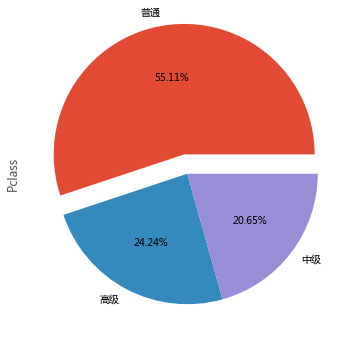

In [15]:
classSe.plot(kind='pie',explode=[0.15,0,0],autopct='%.2f%%',figsize=(12,6))

#### 用柱状图展示在各个港口上船的乘客数量

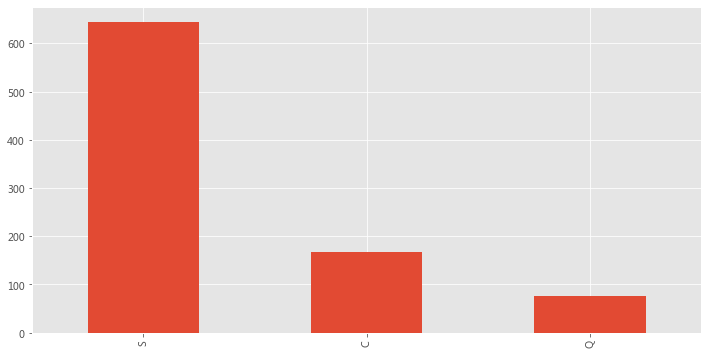

In [16]:
portSe = titanicDf['Embarked'].value_counts()
portSe.plot(kind='bar',figsize=(12,6))

#### 针对柱状图的特有参数
- `color`：单个值或者列表。如果是单个值，改变所有柱形的颜色，如果是列表，为每个柱形配一个颜色
- `edgecolor`：柱形边框颜色。单个值或者列表

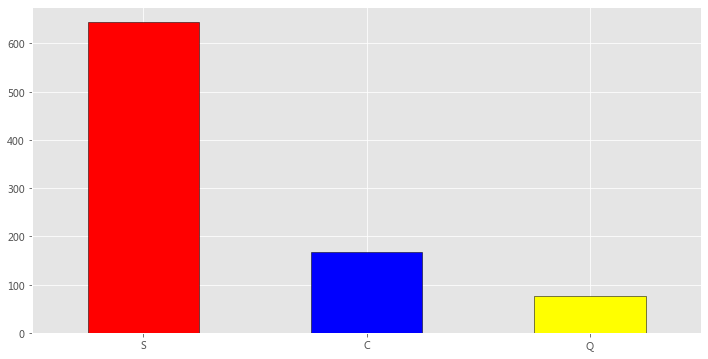

In [17]:
portSe.plot(kind='bar',color=['red','blue','yellow'],figsize=(12,6),edgecolor='black',rot=0)

#### 绘制一个展示船票Fare与乘客年龄和生还与否的散点图

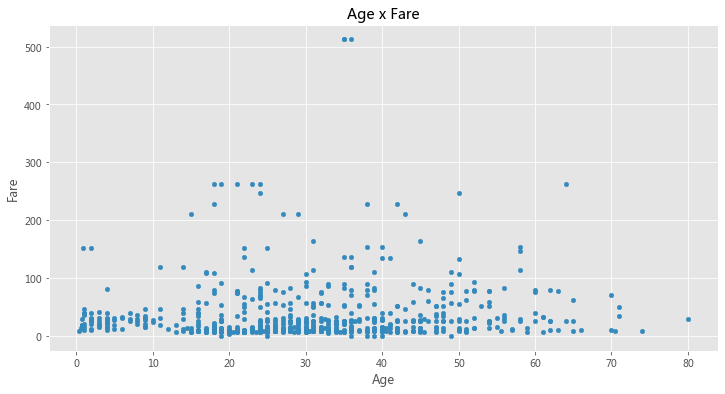

In [18]:
titanicDf.plot(x='Age',y='Fare',kind='scatter',title='Age x Fare',figsize=(12,6))

#### 针对散点图的特有参数
- `s`：点的大小。单个数值或列表。如果是单个数值，所有点被设置成同样大，如果是列表，点的大小按照列表的顺序变化
- `c`：点的颜色。单个数值或列表。如果是单个数值，所有点被设置成同样颜色，如果是列表，点的颜色按照列表的顺序变化

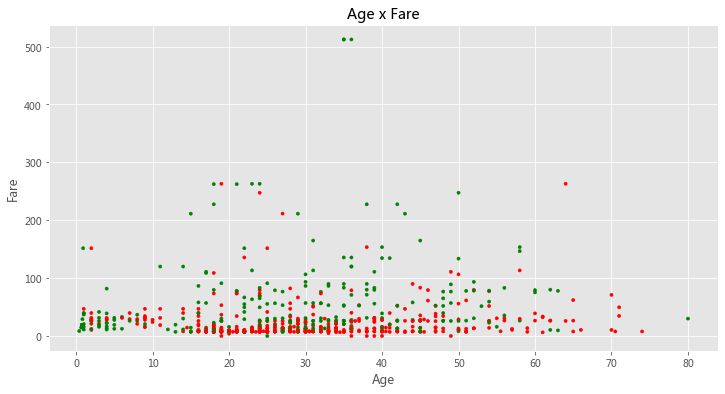

In [19]:
titanicDf.plot(x='Age',y='Fare',kind='scatter',title='Age x Fare',figsize=(12,6),s=10,c=['red' if x==0 else 'green' for x in titanicDf['Survived']])

#### 绘制展示船票价格的直方图

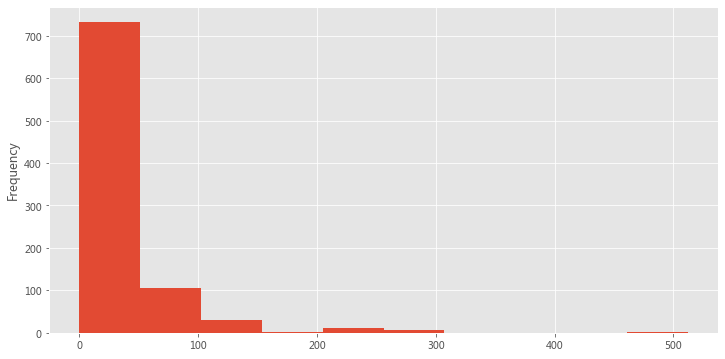

In [20]:
titanicDf['Fare'].plot(kind='hist',figsize=(12,6))

#### 针对直方图特有的参数
- `bins`：整数，划分成的面元（bin）的数量，默认为10

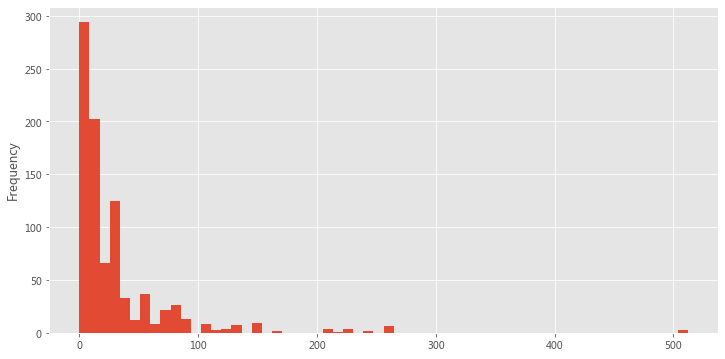

In [21]:
titanicDf['Fare'].plot(kind='hist',bins=60,figsize=(12,6))

#### 同时绘制多列数据

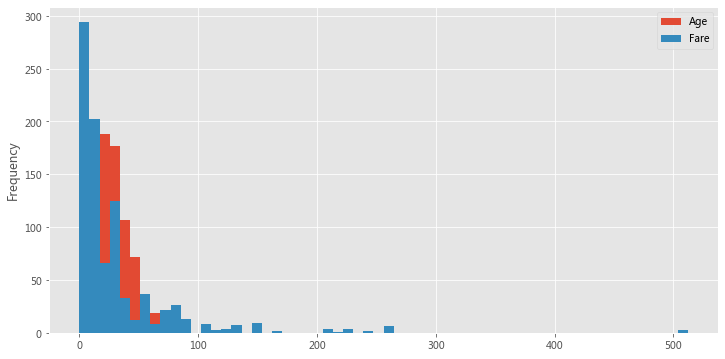

In [22]:
titanicDf.plot(y=['Age','Fare'],kind='hist',bins=60, figsize=(12,6))

- `subplots`：`True`用子图形式展示多列数据；默认是`False`

- `layout`：子图的排列形式。由2个整数构成的元组，分别表示有几行和几列。例如，(1,2)表示1行2列

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feb75b226a0>,
      dtype=object)

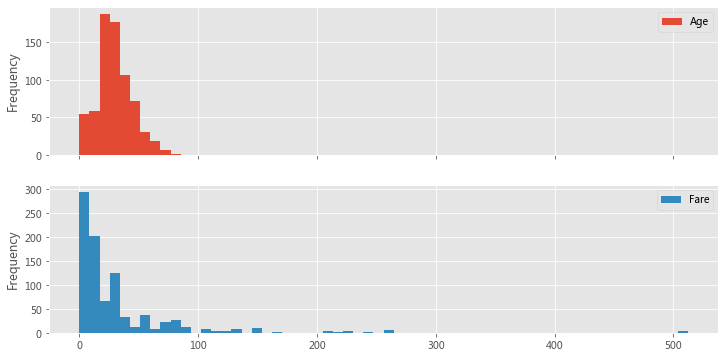

In [23]:
titanicDf.plot(y=['Age','Fare'],kind='hist',bins=60, figsize=(12,6),subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb75982550>,
      dtype=object)

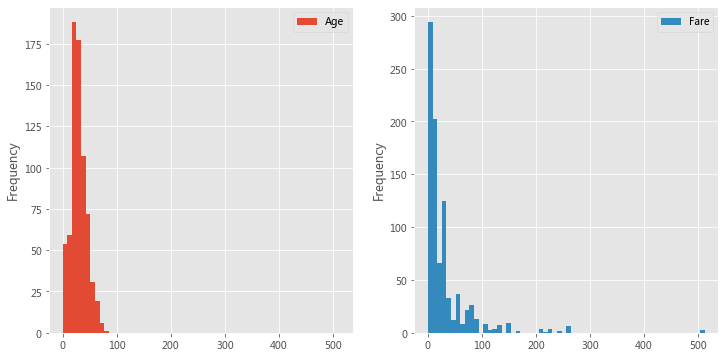

In [24]:
titanicDf.plot(y=['Age','Fare'],kind='hist',bins=60, figsize=(12,6),subplots=True,layout=(1,2))

### 探索时间序列数据

<center><img src="./img/analysis/apple.jpg" width=50%></center>

#### 读取数据

In [66]:
appleDf = pd.read_csv('./data/analysis/Apple_stock.csv')
appleDf.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


#### 查看每列数据类型

In [67]:
appleDf.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

#### 将`Date`列转换为`datetime`类型

In [68]:
appleDf['Date'] = pd.to_datetime(appleDf['Date'])
appleDf.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

```python
pandas.to_datetime(arg)
```
- `arg`：需要被转换成时间类型的原数据
- 返回的是一个`datetime`数据类型

In [94]:
pd.to_datetime('now')

Timestamp('2021-03-30 03:23:17.500518')

In [95]:
pd.to_datetime('today')

Timestamp('2021-03-30 11:23:30.141771')

In [ ]:
pd.to_datetime('2019 12 24 15:15:50')
pd.to_datetime('2019-12-24 15:15:50')
pd.to_datetime('2019/12/24 15:15:50')
pd.to_datetime('12/6/2019 15:15:50')
pd.to_datetime('2019-12-24')
pd.to_datetime('2019-12')
pd.to_datetime('2019')

#### 将`Date`设置为索引

In [69]:
appleDf.set_index('Date',inplace=True)
appleDf.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


#### 将`index`设置为升序

In [70]:
appleDf.sort_index(ascending=True,inplace=True)
appleDf.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


#### 找到每个月的最后一个交易日

In [46]:
monthLastDay = appleDf.resample('BM')
monthLastDay.last()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


#### `resample`函数
```python
DataFrame.resample(rule, axis=0)
```
- `rule`：字符串表示的采样频率
    + `D`：自然天
    + `T/min`：分钟
    + `S`：秒
    + `B`：工作日
    + `M`：月底
    + `BM`：工作月底

#### 数据集中最早的日期和最晚的日期相差多少天？

In [47]:
diff = appleDf.index.max()-appleDf.index.min()
diff

Timedelta('12261 days 00:00:00')

#### 时间差的使用

- `Timedelta`：`pandas`的时间差对象
    + `Timedelta.days`：时间差内包含的天数
    + `Timedelta.total_seconds()`：时间差内包含的总秒数

In [48]:
diff.days
diff.total_seconds()

12261

1059350400.0

- 生成时间差对象
```python
pd.to_timedelta(arg)
```
    + `arg`：需要转换成`Timedelta`类型的数据
    + 返回的是`Timedelta`对象

In [49]:
pd.to_timedelta('1 days')
pd.to_timedelta('1 days 06:05:01')
pd.to_datetime('today')+pd.to_timedelta('1 days')

Timedelta('1 days 00:00:00')

Timedelta('1 days 06:05:01')

Timestamp('2021-03-30 22:30:05.859754')

#### 在数据中一共有多少个月？

In [50]:
monthLastDay.first().shape[0]

404

#### 按照时间顺序可视化`Adj Close`和`Close`值

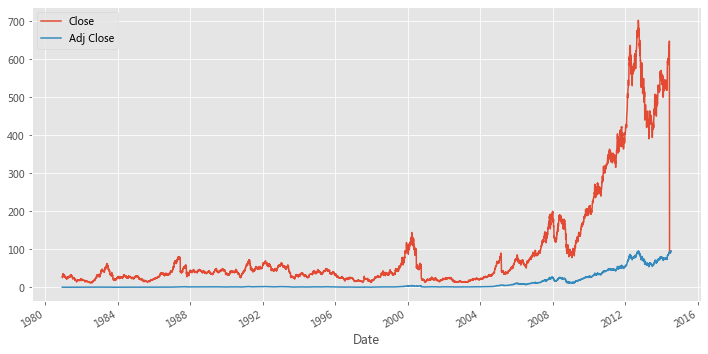

In [51]:
appleDf.plot(y=['Close','Adj Close'],kind='line',figsize=(12,6))

#### 调整横纵坐标轴名称

matplotlib.axes._subplots.AxesSubplot

[Text(0, 0.5, '价格'), Text(0.5, 0, '时间')]

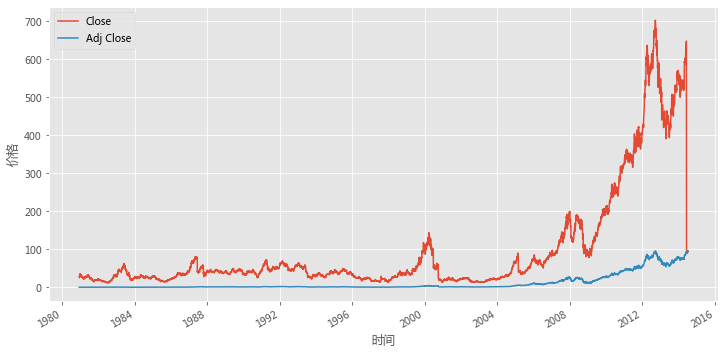

In [52]:
ax = appleDf.plot(y=['Close','Adj Close'],kind='line',figsize=(12,6))
type(ax)
ax.set(xlabel='时间',ylabel='价格')

##### 调整子图横纵坐标轴名称

[Text(0, 0.5, '收盘价'), Text(0.5, 0, '时间')]

[Text(0, 0.5, '调整后的收盘价'), Text(0.5, 0, '时间')]

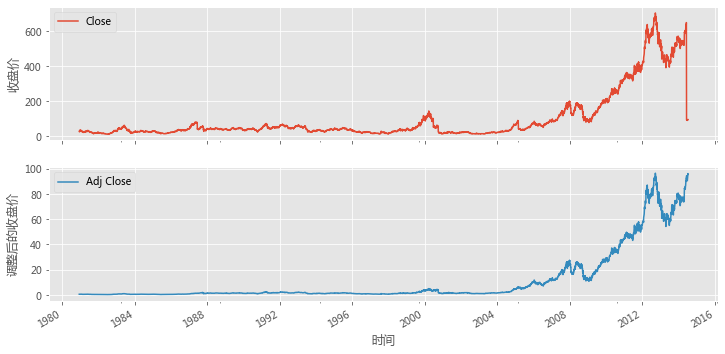

In [53]:
ax1 = appleDf.plot(y=['Close','Adj Close'],kind='line',figsize=(12,6),subplots=True, layout=(2,1))
ax1[0][0].set(xlabel='时间',ylabel='收盘价') 
ax1[1][0].set(xlabel='时间',ylabel='调整后的收盘价')

[Text(0, 0.5, '收盘价'), Text(0.5, 0, '时间')]

[Text(0, 0.5, '调整后的收盘价'), Text(0.5, 0, '时间')]

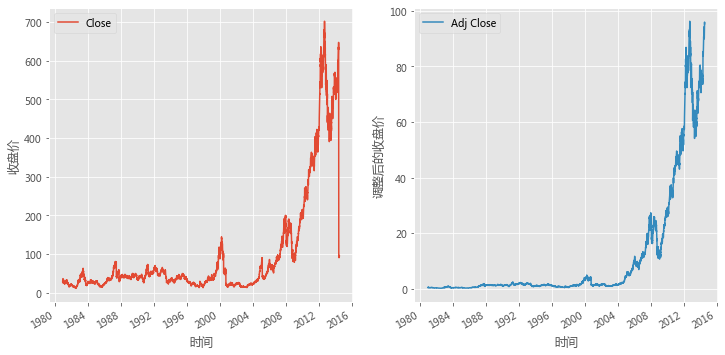

In [54]:
ax1 = appleDf.plot(y=['Close','Adj Close'],kind='line',figsize=(12,6),subplots=True,layout=(1,2))
ax1[0][0].set(xlabel='时间',ylabel='收盘价')
ax1[0][1].set(xlabel='时间',ylabel='调整后的收盘价')

### 交互式绘图

#### 交互式绘图工具

- `plotly`：交互式的开源绘图图库, ['https://plotly.com/python/']('https://plotly.com/python/')

- `bokeh`：`python`专用的交互式绘图工具

In [89]:
IFrame('https://docs.bokeh.org/en/latest/',width=800,height=600)

#### 安装与使用

- 安装
```python
pip install pandas-bokeh
conda install -c patrikhlobil pandas-bokeh
```

- `pandas`使用`bokeh`绘图方法

```python
import pandas_bokeh
pandas_bokeh.output_notebook()   # 在jupyter notebook中显示图形
df.plot_bokeh(kind)
```

- 支持绘制的图形：`line`,`point`,`step`,`scatter`,`bar`,`hist`,`area`,`pie`,`map`

#### 绘制图形

- 绘制柱状图

In [27]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [28]:
classSe.plot_bokeh(kind='bar')

Figure(id='1039', ...)

- 绘制散点图

In [29]:
titanicDf.plot_bokeh(x='Age',y='Fare',kind='scatter')

Figure(id='1146', ...)

- 绘制直方图

In [30]:
titanicDf['Fare'].plot_bokeh(kind='hist')

Figure(id='1270', ...)

- 子图绘制
    - **不支持** `subplots=True`
    - 使用`pandas_bokeh.plot_grid()`

In [31]:
fareFig = titanicDf['Fare'].plot_bokeh(kind='hist',show_figure=False)
ageFig = titanicDf['Age'].plot_bokeh(kind='hist',color='red',show_figure=False)
pandas_bokeh.plot_grid([[fareFig],[ageFig]],plot_width=450)

/home/VENV36/lib/python3.6/site-packages/pandas_bokeh/plot.py:768: Warning: There are NaN values in column 'Age'. For the histogram, these rows have been neglected.
  Warning,


Column(id='1533', ...)

In [32]:
pandas_bokeh.plot_grid([[fareFig,ageFig]],plot_width=450)

Column(id='1694', ...)

- 绘制面积图

In [34]:
energyDf = pd.read_csv('./data/analysis/energy.csv')
energyDf.head()

,Year,Oil,Gas,Coal,Nuclear Energy,Hydroelectricity,Other Renewable
0,1970,2291.5,826.7,1467.3,17.7,265.8,5.8
1,1971,2427.7,884.8,1459.2,24.9,276.4,6.3
2,1972,2613.9,933.7,1475.7,34.1,288.9,6.8
3,1973,2818.1,978.0,1519.6,45.9,292.5,7.3
4,1974,2777.3,1001.9,1520.9,59.6,321.1,7.7


In [35]:
energyDf.plot_bokeh(kind='area',x='Year',figsize=(1000,400),legend='top_left',stacked=True)

Figure(id='1850', ...)

- 绘制饼图

In [36]:
energyDf.iloc[energyDf.shape[0]-1].plot_bokeh(kind='pie')

__x__values_original


Figure(id='2275', ...)

- 比较不同年份能源结构：嵌套的饼图

In [37]:
energyDf.set_index('Year',inplace=True)

In [38]:
energyDf.T

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Oil,2291.5,2427.7,2613.9,2818.1,2777.3,2749.2,2929.1,3028.8,3125.9,3177.4,...,4148.8,4077.6,4208.9,4252.4,4304.9,4359.3,4394.7,4475.8,4557.3,4621.9
Gas,826.7,884.8,933.7,978.0,1001.9,1002.4,1062.0,1096.9,1142.9,1214.3,...,2607.2,2534.6,2730.8,2786.8,2860.8,2899.0,2922.3,2987.3,3073.2,3156.0
Coal,1467.3,1459.2,1475.7,1519.6,1520.9,1550.4,1606.9,1654.5,1673.0,1750.6,...,3500.6,3447.0,3605.6,3778.9,3794.5,3865.3,3862.2,3765.0,3706.0,3731.5
Nuclear Energy,17.7,24.9,34.1,45.9,59.6,82.4,98.1,121.2,140.1,144.7,...,619.5,610.8,626.2,600.0,559.5,563.8,575.0,582.8,591.2,596.4
Hydroelectricity,265.8,276.4,288.9,292.5,321.1,325.9,324.8,333.2,359.5,377.3,...,738.5,736.2,777.5,792.7,830.7,859.4,879.7,880.5,913.3,918.6
Other Renewable,5.8,6.3,6.8,7.3,7.7,7.8,8.7,9.2,9.7,10.4,...,123.9,143.7,170.5,203.5,238.7,282.6,320.1,368.8,417.4,486.8


In [39]:
energyDf.T[[1970,1980,1990,2000,2010,2017]].plot_bokeh(kind='pie')

__x__values_original


Figure(id='2508', ...)

## 数据业务模型

### RFM模型
<center><img src="./img/analysis/rfm.jfif" width=60%></center>

#### 读取数据

- 某个互联网电商一年内的销售数据

In [135]:
rfmDf = pd.read_csv('./data/analysis/rfm_sale.csv')
rfmDf.head()

,Unnamed: 0,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,0,142074,2018-01-01,4196439032,9399.0
1,1,56927,2018-01-01,4198324983,8799.0
2,2,87058,2018-01-01,4191287379,6899.0
3,3,136104,2018-01-01,4198508313,5999.0
4,4,117831,2018-01-01,4202238313,5399.0


In [136]:
rfmDf.dtypes

Unnamed: 0      int64
USERID          int64
ORDERDATE      object
ORDERID         int64
AMOUNTINFO    float64
dtype: object

- 删除无用列

In [137]:
del rfmDf['Unnamed: 0']

#### 重复数据判断与清理

In [140]:
rfmDf.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
76045    False
76046    False
76047    False
76048    False
76049    False
Length: 76050, dtype: bool

In [141]:
rfmDf.duplicated().value_counts()

False    76050
dtype: int64

- 没有重复记录

#### 缺失数据判断与清理

In [142]:
rfmNa = rfmDf.isna()
rfmNa

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76045,False,False,False,False
76046,False,False,False,False
76047,False,False,False,False
76048,False,False,False,False


##### 显示含有缺失值的行

In [149]:
rfmNa.any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
76045    False
76046    False
76047    False
76048    False
76049    False
Length: 76050, dtype: bool

- `DataFrame.any(axis=0)`：沿着纵向（`axis=0`)或横向（`axis=1`）的方向是否有元素是`True`

In [81]:
df = pd.DataFrame({"A": [1, 2], "B": [0, 2], "C": [0, 0]})
df
df.any()
df.any(axis=1) 

,A,B,C
0,1,0,0
1,2,2,0


A     True
B     True
C    False
dtype: bool

0    True
1    True
dtype: bool

In [150]:
rfmDf.loc[rfmNa.values.any(axis=1)] 

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
20,75849,2018-01-01,4197103430,NaN
72,103714,NaN,4136159682,189.0
114,155209,2018-01-01,4177940815,NaN
229,139877,NaN,4111956196,6.3
233,54599,2018-01-01,4119525205,NaN
260,65456,2018-01-02,4195643356,NaN
56387,122134,2018-09-21,3826649773,NaN
63260,116995,2018-10-24,3981569421,NaN
71201,98888,2018-12-06,3814398698,NaN


##### 删除缺失行

In [151]:
rfmDf.dropna(how='any',axis=0,inplace=True)

In [152]:
rfmDf.shape

(76041, 4)

#### 可视化消费金额

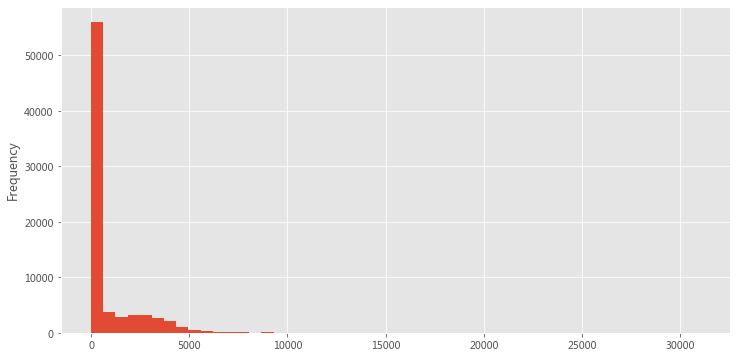

In [159]:
rfmDf['AMOUNTINFO'].plot(kind='hist',bins=50,figsize=(12,6))

- 消费金额的基本信息

In [160]:
rfmDf['AMOUNTINFO'].describe()

count    76041.000000
mean       777.301443
std       1448.300325
min          0.500000
25%         12.500000
50%         65.000000
75%        790.000000
max      30999.000000
Name: AMOUNTINFO, dtype: float64

- 没有金额小于0，不需要进行异常处理

#### 将`ORDERDATE`转变为日期型数据

In [161]:
rfmDf['ORDERDATE']=pd.to_datetime(rfmDf['ORDERDATE'])

In [162]:
rfmDf.dtypes

USERID                 int64
ORDERDATE     datetime64[ns]
ORDERID                int64
AMOUNTINFO           float64
dtype: object

##### 增加一列计算`ORDERDATE`距离今天的间隔

In [163]:
pd.to_datetime('today')-rfmDf['ORDERDATE']

0       1185 days 21:59:20.984094
1       1185 days 21:59:20.984094
2       1185 days 21:59:20.984094
3       1185 days 21:59:20.984094
4       1185 days 21:59:20.984094
                   ...           
76045    823 days 21:59:20.984094
76046    823 days 21:59:20.984094
76047    823 days 21:59:20.984094
76048    823 days 21:59:20.984094
76049    823 days 21:59:20.984094
Name: ORDERDATE, Length: 76041, dtype: timedelta64[ns]

In [164]:
rfmDf['INTERVAL'] = [x.days for x in (pd.to_datetime('today')-rfmDf['ORDERDATE'])]

In [165]:
rfmDf.head()

,USERID,ORDERDATE,ORDERID,AMOUNTINFO,INTERVAL
0,142074,2018-01-01,4196439032,9399.0,1185
1,56927,2018-01-01,4198324983,8799.0,1185
2,87058,2018-01-01,4191287379,6899.0,1185
3,136104,2018-01-01,4198508313,5999.0,1185
4,117831,2018-01-01,4202238313,5399.0,1185


#### 计算R、F、M值

##### 计算最近一次消费

In [166]:
rDf = rfmDf.groupby(by='USERID',sort=False).agg({'INTERVAL':'min'})
rDf.head()

,INTERVAL
USERID,
142074,1180
56927,848
87058,1047
136104,1185
117831,1185


##### 计算年消费频次

In [167]:
fDf = rfmDf.groupby(by='USERID',sort=False).agg({'USERID':'count'})
fDf.head()

,USERID
USERID,
142074,2
56927,2
87058,2
136104,1
117831,1


##### 计算年消费金额

In [168]:
mDf = rfmDf.groupby(by='USERID',sort=False).agg({'AMOUNTINFO':'sum'})
mDf.head()

,AMOUNTINFO
USERID,
142074,9408.9
56927,8826.9
87058,11898.0
136104,5999.0
117831,5399.0


##### 将上述三个表合并成一个表

In [169]:
tmp = rDf.merge(fDf,left_index=True,right_index=True)
tmp.head()

,INTERVAL,USERID
USERID,,
142074,1180,2
56927,848,2
87058,1047,2
136104,1185,1
117831,1185,1


In [170]:
totDf = tmp.merge(mDf,left_index=True,right_index=True)
totDf.head()

,INTERVAL,USERID,AMOUNTINFO
USERID,,,
142074,1180,2,9408.9
56927,848,2,8826.9
87058,1047,2,11898.0
136104,1185,1,5999.0
117831,1185,1,5399.0


##### 更改列名

In [171]:
totDf.columns = ['最近一次消费间隔','年消费次数','年消费金额']
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额
USERID,,,
142074,1180,2,9408.9
56927,848,2,8826.9
87058,1047,2,11898.0
136104,1185,1,5999.0
117831,1185,1,5399.0


##### 对R、F、M打分

- 均使用$1\sim5$打分
- 最近一次消费间隔越大，分值越小
- 年消费次数越大，分值越大
- 年消费金额越大，分值越大
- 将各个维度的分值作为新列接在原数据表上

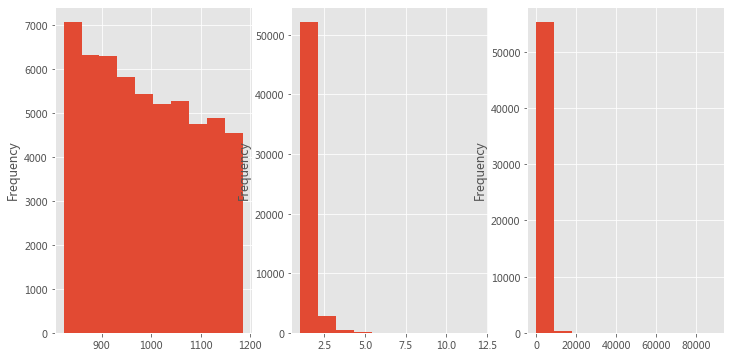

In [192]:
fig,ax = plt.subplots(1,3,figsize=(12,6))
totDf['最近一次消费间隔'].plot(kind='hist',ax=ax[0])
totDf['年消费次数'].plot(kind='hist',ax=ax[1])
totDf['年消费金额'].plot(kind='hist',ax=ax[2])

In [193]:
pd.qcut(totDf['最近一次消费间隔'],q=5)
pd.qcut(totDf['年消费金额'],q=5)

USERID
142074    (1100.0, 1185.0]
56927     (822.999, 881.0]
87058     (1020.0, 1100.0]
136104    (1100.0, 1185.0]
117831    (1100.0, 1185.0]
                ...       
154947    (822.999, 881.0]
66477     (822.999, 881.0]
140056    (822.999, 881.0]
51680     (822.999, 881.0]
109535    (822.999, 881.0]
Name: 最近一次消费间隔, Length: 55540, dtype: category
Categories (5, interval[float64]): [(822.999, 881.0] < (881.0, 948.6] < (948.6, 1020.0] < (1020.0, 1100.0] < (1100.0, 1185.0]]

USERID
142074    (2286.0, 89566.9]
56927     (2286.0, 89566.9]
87058     (2286.0, 89566.9]
136104    (2286.0, 89566.9]
117831    (2286.0, 89566.9]
                ...        
154947        (0.499, 14.9]
66477         (0.499, 14.9]
140056        (0.499, 14.9]
51680         (0.499, 14.9]
109535        (0.499, 14.9]
Name: 年消费金额, Length: 55540, dtype: category
Categories (5, interval[float64]): [(0.499, 14.9] < (14.9, 61.9] < (61.9, 299.0] < (299.0, 2286.0] < (2286.0, 89566.9]]

In [194]:
totDf['年消费次数'].value_counts()

1     39130
2     12957
3      2887
4       506
5        54
6         5
12        1
Name: 年消费次数, dtype: int64

- 消费次数不同数值过少，不适宜用分位数分类，手动设定分类区间

In [195]:
pd.cut(totDf['年消费次数'],bins=[0,1,2,3,5,12])

USERID
142074    (1, 2]
56927     (1, 2]
87058     (1, 2]
136104    (0, 1]
117831    (0, 1]
           ...  
154947    (0, 1]
66477     (0, 1]
140056    (0, 1]
51680     (0, 1]
109535    (0, 1]
Name: 年消费次数, Length: 55540, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 5] < (5, 12]]

In [196]:
totDf['R'] = pd.qcut(totDf['最近一次消费间隔'],q=5,labels=range(5,0,-1))
totDf['F'] = pd.cut(totDf['年消费次数'],bins=[0,1,2,3,5,12],labels=range(1,6,1))
totDf['M'] = pd.qcut(totDf['年消费金额'],q=5,labels=range(1,6,1)) 
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额,R,F,M
USERID,,,,,,
142074,1180,2,9408.9,1,2,5
56927,848,2,8826.9,5,2,5
87058,1047,2,11898.0,2,2,5
136104,1185,1,5999.0,1,1,5
117831,1185,1,5399.0,1,1,5


#### 计算RFM总值

##### 新建立一列记录RFM总值
$$
RFM = 100\times R + 10\times F + 1\times M
$$

In [197]:
totDf['RFM'] = 100*np.array(totDf['R'])+10*np.array(totDf['F'])+np.array(totDf['M'])
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额,R,F,M,RFM
USERID,,,,,,,
142074,1180,2,9408.9,1,2,5,125
56927,848,2,8826.9,5,2,5,525
87058,1047,2,11898.0,2,2,5,225
136104,1185,1,5999.0,1,1,5,115
117831,1185,1,5399.0,1,1,5,115


- 由于`Series`不能直接运行算术运算，所以先把每一列变成`Numpy`的数组`array`，方法是`np.array(Series)`

##### 分类客户

In [198]:
cLabels = ['流失客户','一般维持客户','新客户','潜力客户','重要挽留客户','重要深耕客户','重要唤回客户','重要价值客户']
pd.cut(totDf['RFM'],bins=8,labels=cLabels)

USERID
142074      流失客户
56927     重要价值客户
87058        新客户
136104      流失客户
117831      流失客户
           ...  
154947    重要价值客户
66477     重要价值客户
140056    重要价值客户
51680     重要价值客户
109535    重要价值客户
Name: RFM, Length: 55540, dtype: category
Categories (8, object): [流失客户 < 一般维持客户 < 新客户 < 潜力客户 < 重要挽留客户 < 重要深耕客户 < 重要唤回客户 < 重要价值客户]

In [199]:
totDf['Label'] = pd.cut(totDf['RFM'],bins=8,labels=cLabels)
totDf.head()

,最近一次消费间隔,年消费次数,年消费金额,R,F,M,RFM,Label
USERID,,,,,,,,
142074,1180,2,9408.9,1,2,5,125,流失客户
56927,848,2,8826.9,5,2,5,525,重要价值客户
87058,1047,2,11898.0,2,2,5,225,新客户
136104,1185,1,5999.0,1,1,5,115,流失客户
117831,1185,1,5399.0,1,1,5,115,流失客户


#### 可视化各类客户比例

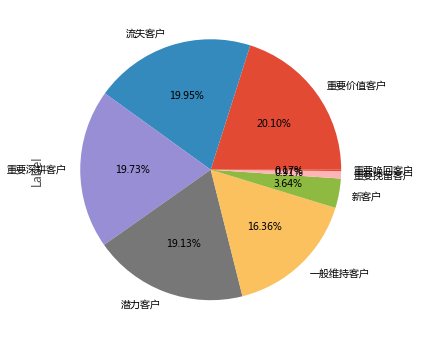

In [200]:
totDf['Label'].value_counts().plot(kind='pie',figsize=(12,6),autopct='%.2f%%')

[Text(0, 0.5, '金额'), Text(0.5, 0, '客户类型')]

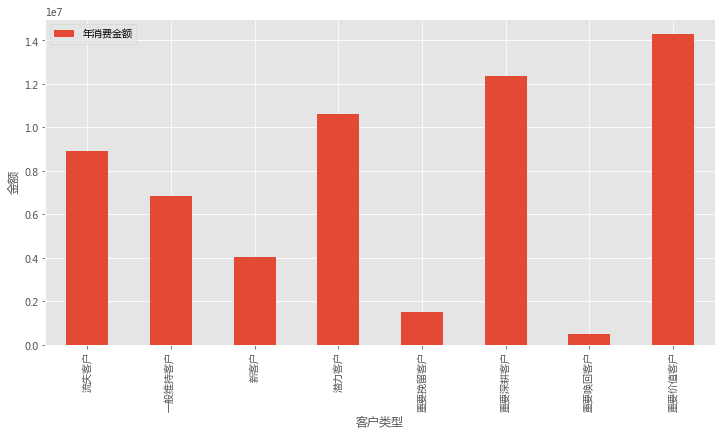

In [201]:
axRFM = totDf.groupby('Label').agg({'年消费金额':'sum'}).plot(kind='bar',figsize=(12,6))
axRFM.set(xlabel='客户类型',ylabel='金额')

## 数据统计分析

- `SciPy`是一个进行科学计算的工具箱
- 积分、插值、线性代数、优化、统计等

```python
from scipy import stats
```

### 两组样本均值比较

- 推断两个样本的均值是否一样
- 利用`t`检验

#### 问题

- 泰坦尼克生还和未生还人员在年龄和船票价格上有差异吗？

In [5]:
titanicDf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 提出假设

In [6]:
titanicDf.groupby(by='Survived').agg({'Fare':'mean','Age':'mean'})

,Fare,Age
Survived,,
0,22.117887,30.626179
1,48.395408,28.343690


<dl class="row alert-info">
    <dt class="col-md-2">假设1：</dt>
    <dd class="col-md-10">生还人员和未生还人员购买的船票价格有显著差异。</dd>
</dl>
<dl class="row alert-danger">
    <dt class="col-md-2">假设2：</dt>
    <dd class="col-md-10">生还人员和未生还人员的年龄有显著差异。</dd>
</dl>

#### 数据预处理

##### 是否有重复记录

In [9]:
titanicDup = titanicDf.duplicated()
titanicDup.value_counts() 

False    891
dtype: int64

- 该数据集没有重复记录

##### 是否有缺失值

In [47]:
titanicNa = titanicDf.isna()
titanicNa
titanicNa.sum(axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 填补缺失值

In [11]:
titanicDf['Age'].fillna(titanicDf['Age'].mean(),inplace=True) 

#### 检验假设

##### 生成生还人员的船票价格序列和未生还人员的船票价格序列

In [12]:
fareSurv = titanicDf.loc[titanicDf['Survived']==1,'Fare']
fareUnsurv = titanicDf.loc[titanicDf['Survived']==0,'Fare']

##### 两列的方差是否一样
```python
stats.levene(sample1,sample2)
```
- 检验两个样本的方差是否一样。原假设：两个样本的方差一样
- 返回两个值，分别是检验统计量和$p$值

In [13]:
lstatsFare, lpvFare = stats.levene(fareSurv,fareUnsurv)
print(f'方差相等检验的统计量是{lstatsFare},p值是{lpvFare}')
print(f'方差相等检验的统计量是{lstatsFare:.3f},p值是{lpvFare:.3f}')

方差相等检验的统计量是45.09964096576531,p值是3.337352710626e-11
方差相等检验的统计量是45.100,p值是0.000


- 结论：`fareSurv`和`fareUnsurv`序列的方差**不相等**，假设不成立。

##### 两列的均值是否相等

```python
stats.ttest_ind(sample1,sample2,equal_var=True)
```
- $t$检验，检验两个样本序列的均值是否相等。原假设：两个样本序列的均值相等
- `equal_var`：两个样本序列的方差是否一样，默认一样
- 返回两个值，分别是$t$统计量和$p$值

In [14]:
tstatsFare, tpvFare = stats.ttest_ind(fareSurv,fareUnsurv,equal_var=False)
print(f't检验的统计量是{tstatsFare:.3f}，p值是{tpvFare:.3f}')

t检验的统计量是6.839，p值是0.000


- 结论：`fareSurv`和`fareUnsurv`序列的均值**不相等**。

##### 生成生还人员的年龄序列和未生还人员的年龄序列

In [15]:
ageSurv = titanicDf.loc[titanicDf['Survived']==1,'Age']
ageUnsurv = titanicDf.loc[titanicDf['Survived']==0,'Age']

##### 检验两个序列方差是否一样

In [16]:
lstatsAge, lpvAge = stats.levene(ageSurv,ageUnsurv)
print(f'方差相等检验的统计量是{lstatsAge:.3f},p值是{lpvAge:.3f}')

方差相等检验的统计量是5.481,p值是0.019


- 结论：`ageSurv`和`ageUnsurv`序列的方差**不相等**。

##### 两列均值是否相等

In [17]:
tstatsAge,tpvAge = stats.ttest_ind(ageSurv,ageUnsurv,equal_var=False)
print(f't检验的统计量是{tstatsAge:.3f}，p值是{tpvAge:.3f}')

t检验的统计量是-2.039，p值是0.042


- 结论：ageSurv和ageUnsurv序列的均值**不相等**，假设2成立。

### 多组样本均值比较

- 推断**多个**样本的均值是否相等
- 方差分析（ANOVA，**AN**alysis **O**f **Va**riance）

- 相对于两两`t`检验的优势：减少类型I错误（据真错误）
    + 类型I错误：原假设是正确的，但是却拒绝了原假设

#### 问题

- 购买不同船票等级的乘客年龄是否存在差异？

In [18]:
titanicDf['Pclass'].unique()

array([3, 1, 2])

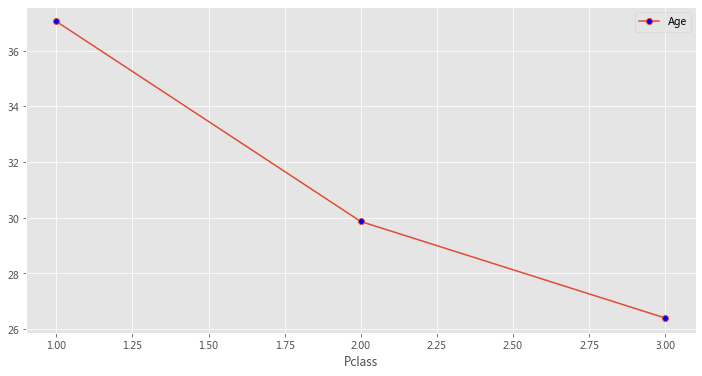

In [19]:
titanicDf.groupby('Pclass').agg({'Age':'mean'}).plot(kind='line',figsize=(12,6),marker='o',markerfacecolor='blue') 

#### 提出假设

<dl class="row alert-info">
    <dt class="col-md-2">假设3：</dt>
    <dd class="col-md-10">购买不同船票等级的的乘客年龄均值不相等。</dd>
</dl>

#### 假设检验

```python
    stats.f_oneway(args)
```
- 执行单因素方差分析
- `args`:需比较的多个样本
- 返回两个值，分别是$F$统计量和$p$值

In [20]:
fstats, fpv = stats.f_oneway(titanicDf.loc[titanicDf['Pclass']==1,'Age'],titanicDf.loc[titanicDf['Pclass']==2,'Age'],titanicDf.loc[titanicDf['Pclass']==3,'Age'])
print(f'F检验的统计量是{fstats:.3f}，p值是{fpv:.3f}')

F检验的统计量是56.574，p值是0.000


- 结论:购买三个船票等级的乘客年龄均值存在**显著差异**.

### 连续变量的相关性检验

#### 问题

- 乘客的年龄和购买的船票价格之间是否有关系?

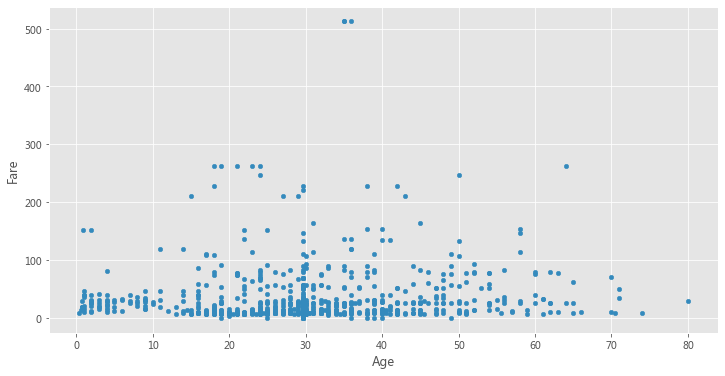

In [21]:
titanicDf.plot(x='Age',y='Fare',kind='scatter',figsize=(12,6))

#### 相关性检验

```python
    stats.pearsonr(x, y)
```
- 计算两个样本之间的相关系数
- `x`和`y`:输入的样本
- 返回相关系数和$p$值

In [22]:
r,pv = stats.pearsonr(titanicDf['Age'],titanicDf['Fare'])
print(f'乘客年龄和购买船票价格之间的相关系数是{r:.3f},p值是{pv:.3f}')

乘客年龄和购买船票价格之间的相关系数是0.092,p值是0.006


### 分类变量的相关性检验

- $\chi^2$卡方检验用来检验两个分类变量之间是否存在显著的相关性
- 原假设:两个分类变量之间**不存在**显著相关性.

#### 问题

- 乘客购买的船票等级和生存与否是否有关联?
- 在哪个港口登船与生存是否有关联?

#### 提出假设

<dl class="row alert-info">
    <dt class="col-md-2">假设4：</dt>
    <dd class="col-md-10">乘客购买的船票等级与生存与否<strong>不存在</strong>显著的相关性。</dd>
</dl>
<dl class="row alert-danger">
    <dt class="col-md-2">假设5：</dt>
    <dd class="col-md-10">乘客登船的港口与生存与否<strong>不存在</strong>显著的相关性。</dd>
</dl>

#### 假设检验

```python
    stats.chi2_contingency(observed)
```
- `observed`:`contingency table`列联表,也被称作`crosstab`
- 返回$\chi^2$值,$p$值,自由度和期望的频率分布

- 列联表

''|dog|cat|总计
---|---|---|---
male|42|10|52
female|9|39|48
总计|51|49|100

```python
    pd.crosstab(index, columns, margins=False, dropna=True)
```
- `index`:位于行的分类变量
- `columns`:位于列的分类变量
- `margins`:是否显示总计列或行

In [23]:
crtbClass = pd.crosstab(titanicDf['Survived'],titanicDf['Pclass'],margins=True)
crtbClass

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [24]:
chiClass, pvClass, _, _ = stats.chi2_contingency(crtbClass)
print(f'卡方值为{chiClass:.3f},p值为{pvClass:.3f}')

卡方值为102.889,p值为0.000


- 结论:假设4得到验证,购买的船票等级与生存与否之间存在显著相关性.

In [25]:
crtbPort = pd.crosstab(titanicDf['Survived'],titanicDf['Embarked'],margins=True)
crtbPort 

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [26]:
chiPort, pvPort ,_ ,_ = stats.chi2_contingency(crtbPort)
print(f'卡方值为{chiPort:.3f},p值为{pvPort:.3f}')

卡方值为26.489,p值为0.000


- 结论:假设5得到验证,登船港口与生存与否之间存在显著相关性.

### 回归分析

- 一种预测建模技术
- 研究一个或多个自变量与**一个**因变量之间的显著关系
- 展示自变量对因变量的影响强度
- 通过已经建立的回归模型预测新的目标值

#### 一元线性回归模型

$$
y = \beta_1 x+\beta_0 + \varepsilon
$$

- $x$：自变量
- $y$：因变量
- $\beta_1$：回归系数
- $\beta_0$：截距
- $\varepsilon$：随机误差

####  问题

- 房价受到哪些因素影响？

#### 读入数据

In [22]:
bostonDf = pd.read_csv('./data/analysis/boston.csv')
bostonDf.head()
bostonDf.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(506, 14)

变量|含义
---|---
CRIM|犯罪率
ZN|住宅用地所占比例
INDUS|城镇中非住宅用地所占比例
CHAS|虚拟变量
NOX|环保指数
RM|每栋住宅的房间数
AGE|1940年以前建成的自住单位的比例
DIS|距离5个波士顿的就业中心的加权距离
RAD|距离高速公路的便利指数
TAX|每一万美元的不动产税率
PTRATIO|城镇中的教师学生比例
B|城镇中的黑人比例
LSTAT|地区中有多少房东属于低收入人群
MEDV|自住房屋房价中位数（即均价）

#### 数据预处理

##### 重复值

In [28]:
bostonDf.duplicated().unique()

array([False])

- 结论：该数据集没有重复记录。

##### 缺失值

In [29]:
bostonDf.isna().sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- 该数据集没有缺失值。

#### 提出假设

##### 可视化各个因素与房价之间的关系

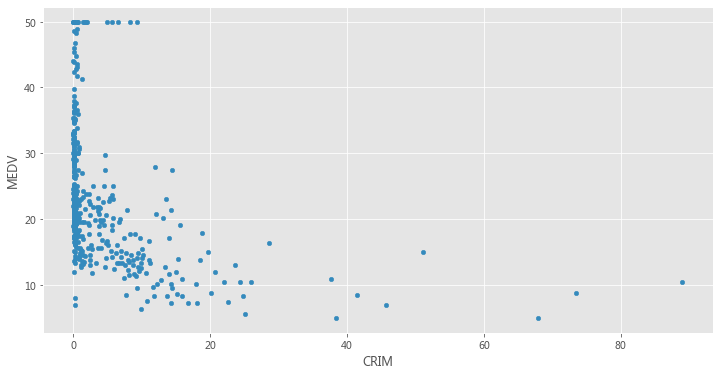

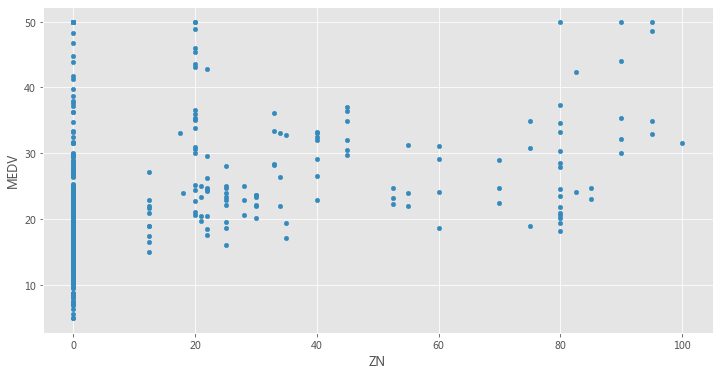

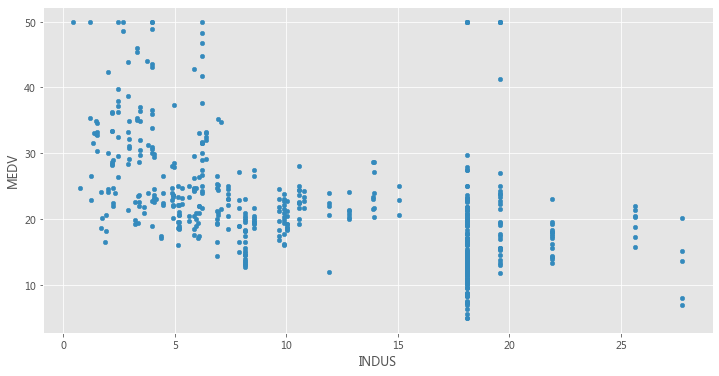

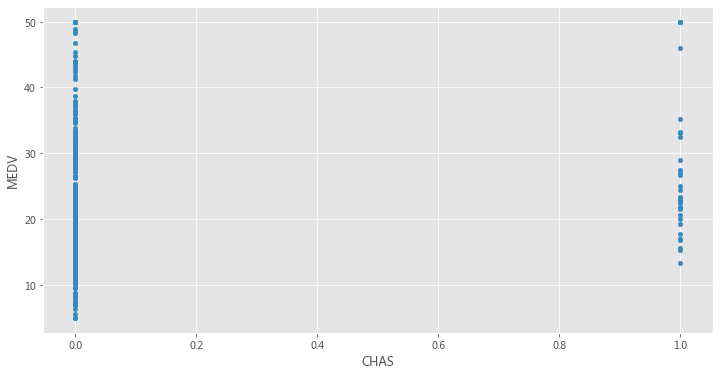

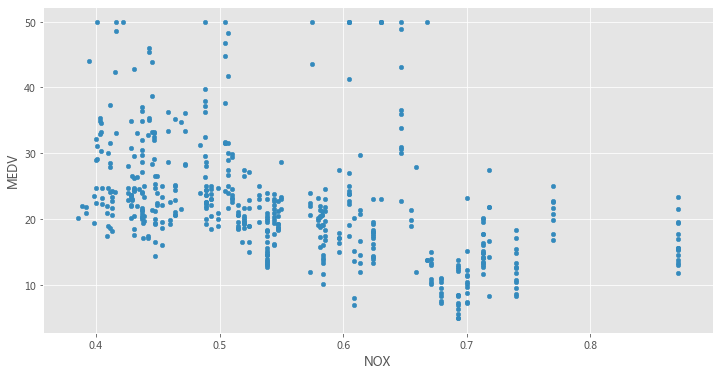

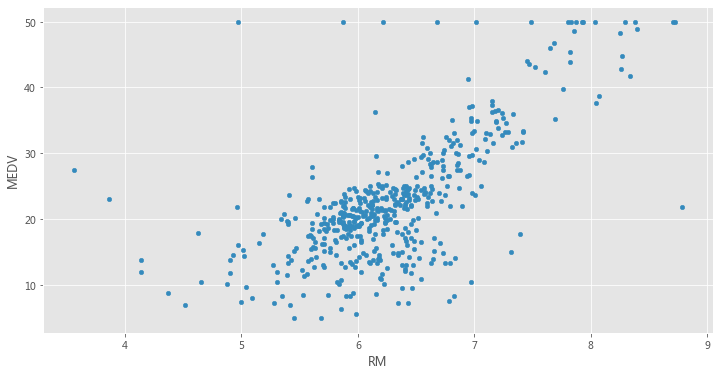

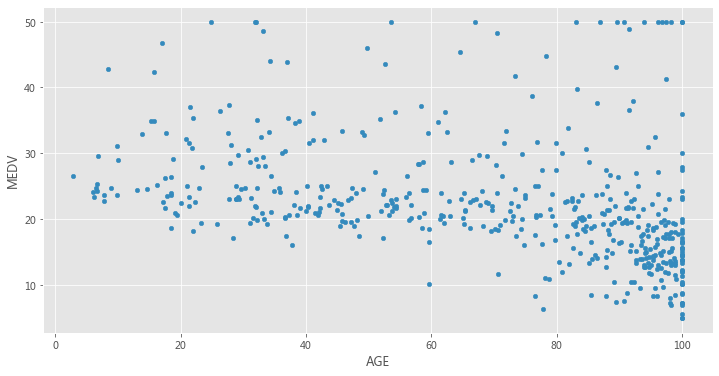

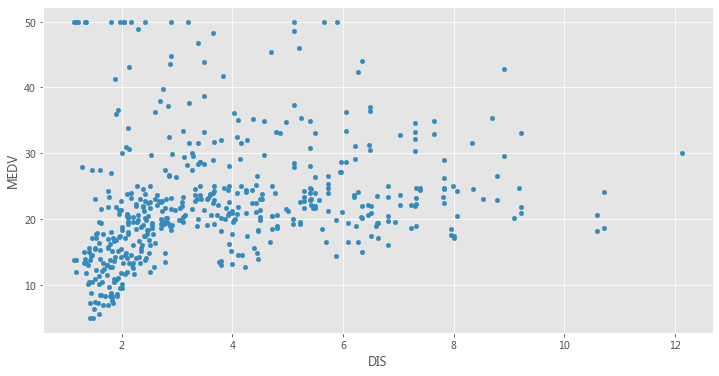

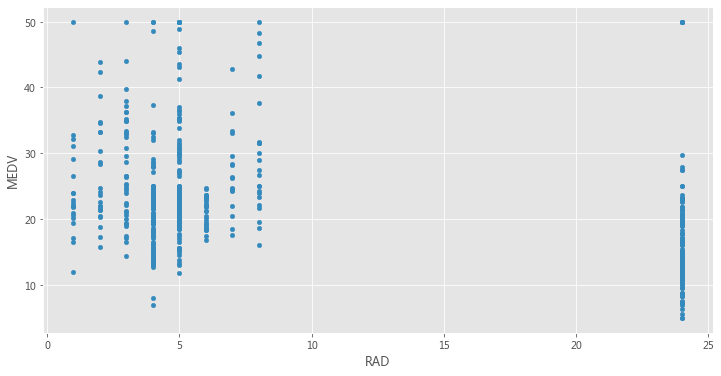

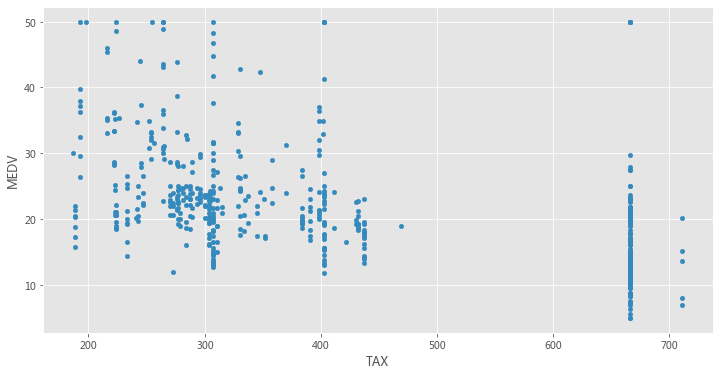

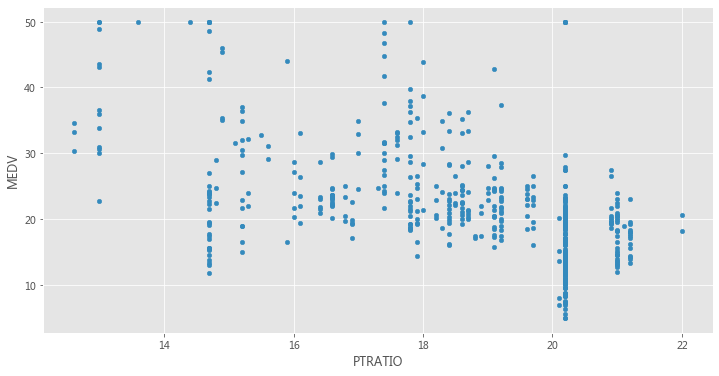

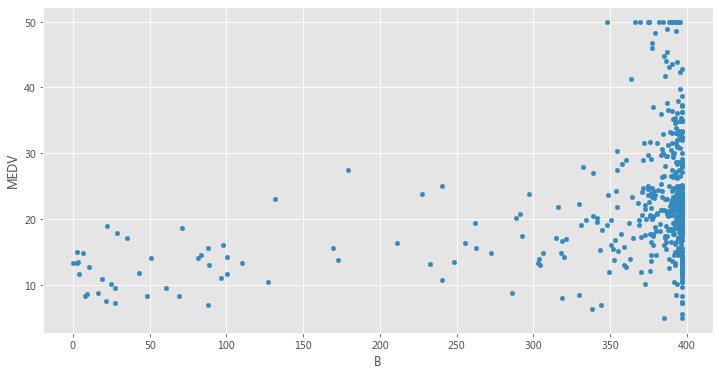

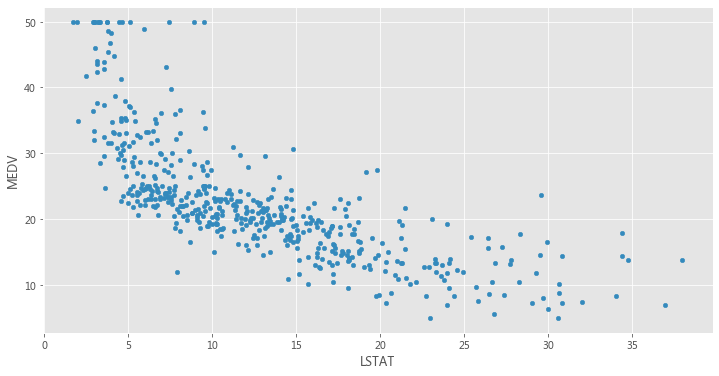

In [31]:
for each in bostonDf.columns[:-1]: 
    _ = bostonDf.plot(x=each,y='MEDV',kind='scatter',figsize=(12,6))

<dl class="row alert-info">
    <dt class="col-md-2">假设6：</dt>
    <dd class="col-md-10">房屋的房间数量能够显著提升房价。</dd>
</dl>
<dl class="row alert-danger">
    <dt class="col-md-2">假设7：</dt>
    <dd class="col-md-10">地区中房东属于低收入人群的数量能够显著降低房价。</dd>
</dl>

#### 假设检验

```python
stats.linregress(x,y)
```
- 进行最小二乘回归，`x`为自变量，`y`为因变量
- 返回回归系数、截距、$R$相关系数、$p$值、标准误

In [32]:
rmb1, rmb0, rmr, rmpv, _ = stats.linregress(bostonDf['RM'],bostonDf['MEDV'])
print(f'房屋数量的回归系数是{rmb1:.3f}，p值是{rmpv:.3f}, 回归方程的截距是{rmb0:.3f}，R-squared是{rmr**2:.3f}')

房屋数量的回归系数是9.102，p值是0.000, 回归方程的截距是-34.671，R-squared是0.484


In [33]:
lstb1, lstb0, lstr, lstpv, _ = stats.linregress(bostonDf['LSTAT'],bostonDf['MEDV'])
print(f'房屋房间数量的回归系数是{lstb1:.3f}，p值是{lstpv:.3f}, 回归方程的截距是{lstb0:.3f}，R-squared是{lstr**2:.3f}')

房屋房间数量的回归系数是-0.950，p值是0.000, 回归方程的截距是34.554，R-squared是0.544


##### 计算拟合值

$$
\hat{y} = \beta_1\times x + \beta_0
$$

In [34]:
bostonDf['rmMedv'] = rmb1*np.array(bostonDf['RM'])+rmb0
bostonDf['lstMedv'] = lstb1*np.array(bostonDf['LSTAT'])+lstb0
bostonDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,rmMedv,lstMedv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,25.175746,29.822595
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,23.774021,25.870390
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.728032,30.725142
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,29.025938,31.760696
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,30.382152,29.490078


##### 绘制回归线

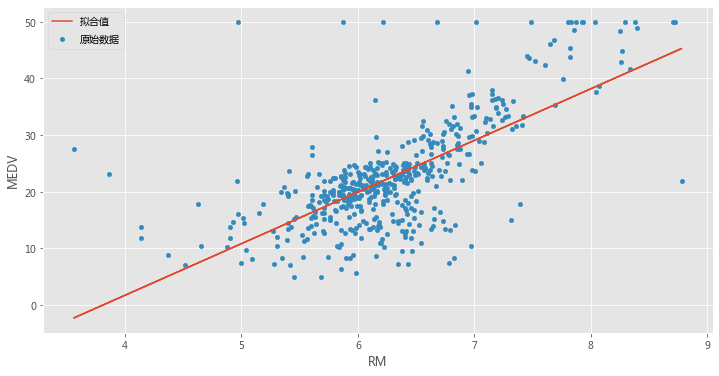

In [36]:
axrm = bostonDf.plot(x='RM',y='MEDV',kind='scatter',figsize=(12,6), label='原始数据')
_ = bostonDf.plot(x='RM',y='rmMedv',kind='line',label='拟合值', ax=axrm)
_ = axrm.legend()

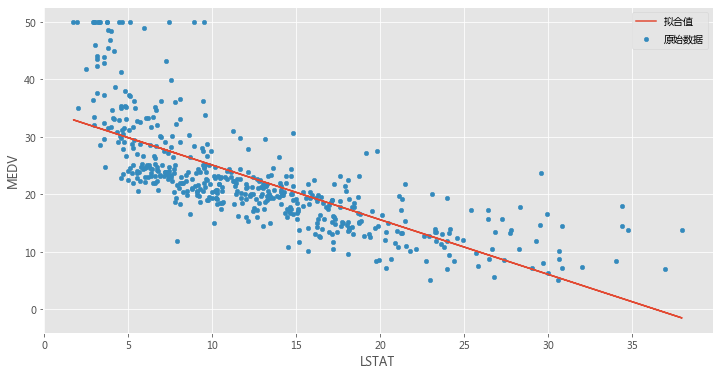

In [37]:
axlst = bostonDf.plot(x='LSTAT',y='MEDV',kind='scatter',figsize=(12,6), label='原始数据')
_ = bostonDf.plot(x='LSTAT',y='lstMedv',kind='line',label='拟合值', ax=axlst)
_ = axlst.legend()

- 结论：假设6成立，房屋的房间数量越多，房价越高。

- 结论：假设7成立，地区中房东属于低收入人群的数量越多，房价越低。

### 统计绘图

#### 简介

- `seaborn`：`python`的统计绘图软件包
    - 以`matplotlib`为基础
    - 与`pandas`紧密结合

In [39]:
IFrame("https://seaborn.pydata.org/index.html",width=800,height=600)

- 安装
    - `pip install seaborn`
    - `conda install -c anaconda seaborn`

- 使用
    - `import seaborn as sns`
    - `sns.set_theme(context,style)`
        - `context`：paper, notebook, poster，talk
        - `style`：darkgrid, whitegrid, dark, white, ticks

#### 关系图

In [29]:
sns.set_theme(context='notebook',style='whitegrid')

```python
sns.relplot(data,x,y,kind,row,col,hue,style,size)
```
- `data`：`pandas.DataFrame`
- `kind`：绘图类型，`scatter`或者`line`
- `row`,`col`：数据中列的名称，指定子图绘制
- `hue`,`style`,`size`：分组变量，数据中列的名称，指定不同组的颜色、样式、大小

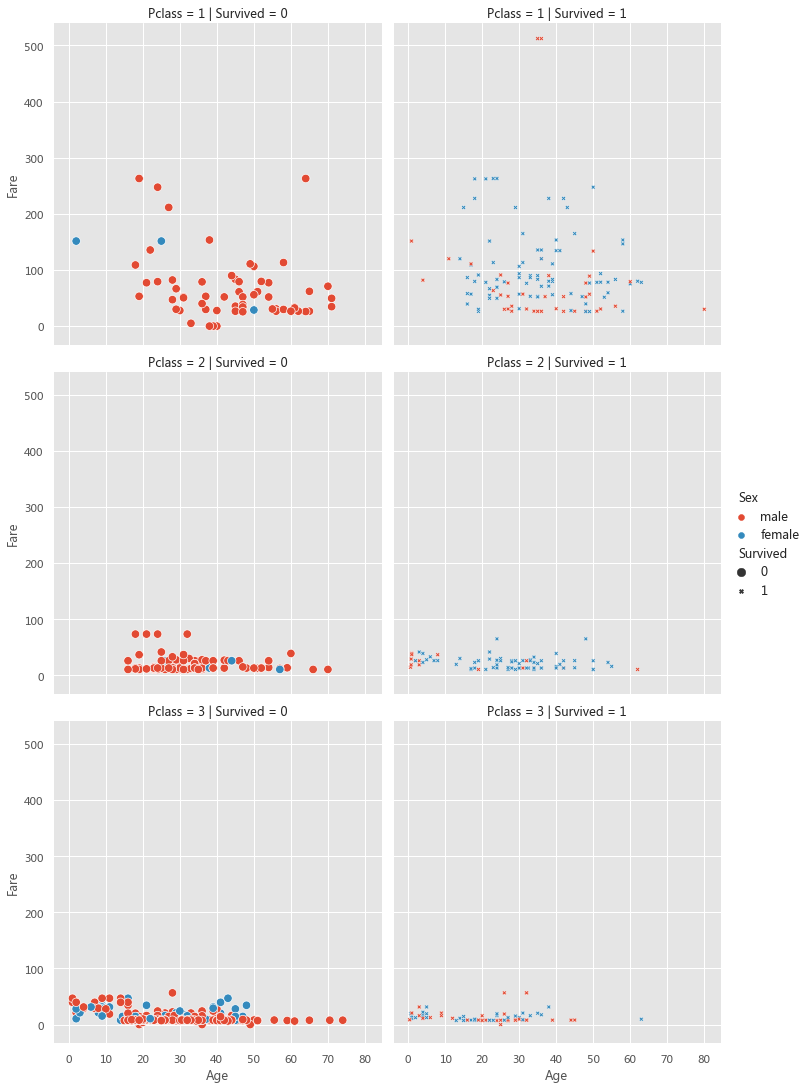

In [60]:
sns.relplot(data=titanicDf,kind='scatter',x='Age',y='Fare',row='Pclass',col='Survived',hue='Sex',style='Survived',size='Survived')

#### 分布图

```python
sns.displot(data,x,y,kind,row,col,hue,kde=False)
```
- `kind`：hist,kde,ecdf
- `kde`：是否绘制密度曲线，与`kind='hist'`配合使用

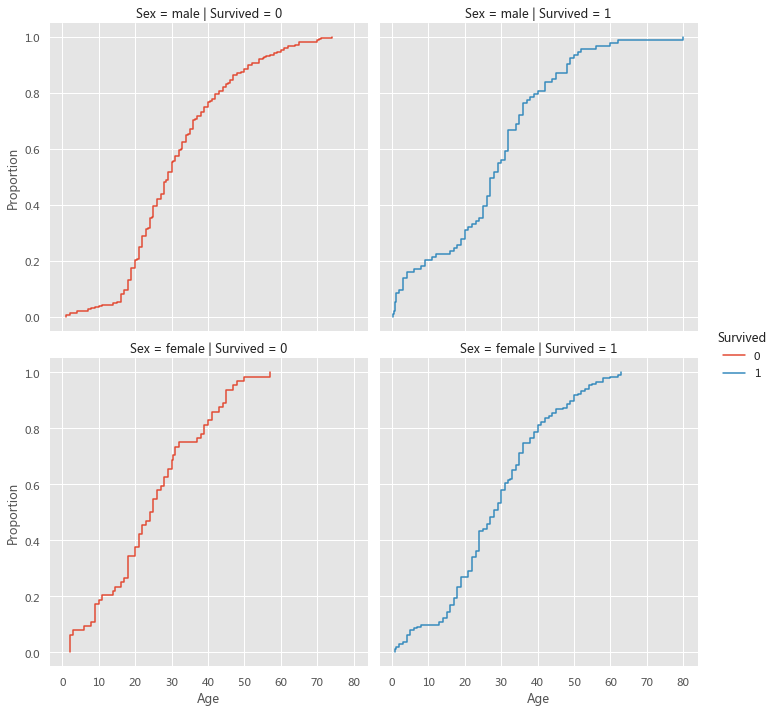

In [64]:
sns.displot(data=titanicDf,x='Age',kind='ecdf',row='Sex',col='Survived',hue='Survived')

#### 分类变量图

```python
sns.catplot(data,x,y,kind,row,col,hue)
```
- `kind`：“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”

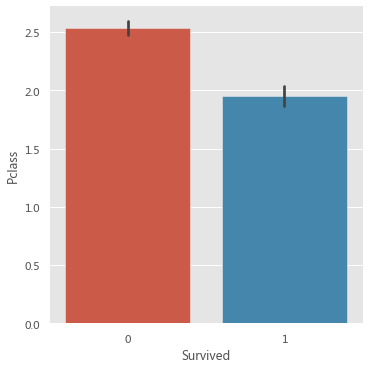

In [66]:
sns.catplot(data=titanicDf,x='Survived',y='Pclass',kind='bar')

#### 回归图

```python
sns.lmplot(data,x,y,row,col,hue)
```

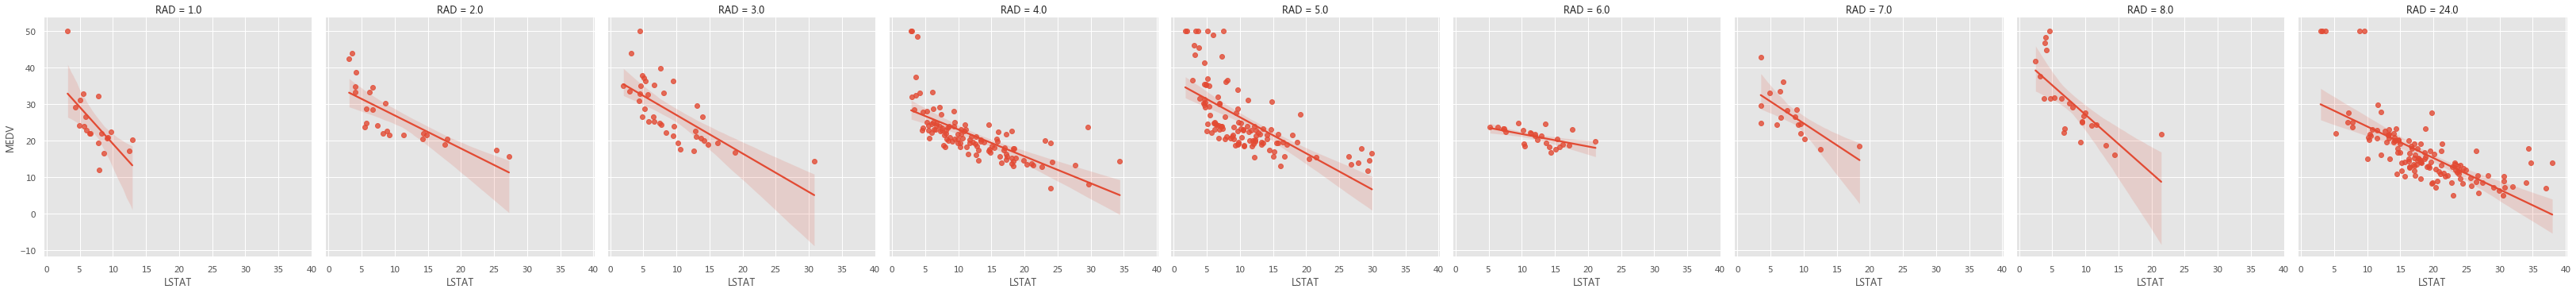

In [67]:
sns.lmplot(data=bostonDf,x='LSTAT',y='MEDV',col='RAD')

### 更加深入的统计分析

- 需要用到`StatsModels`包
- [https://www.statsmodels.org/stable/index.html](https://www.statsmodels.org/stable/index.html)

- 安装：
```python
    pip install statsmodels
    conda install -c anaconda statsmodels
```

- 使用
```python
import statsmodels.formula.api as smf
```

#### 多元线性回归

```python
# 构建模型
md = smf.ols(formula,data,subset)
```
- `formula`：`str`类型，描述公式
- `data`：`pandas.DataFrame`
- `subset`：布尔、整数、索引数组，指定原始数据中的子集用于回归分析
- `md`：返回的是`model`实例

```python
# 拟合数据
res = md.fit()
```

```python
# 显示结果
print(res.summary())
```

In [70]:
resBoston = smf.ols('MEDV~RM+LSTAT+CRIM+NOX+RAD',data=bostonDf,subset=bostonDf['RAD']>20).fit()
resBoston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     38.61
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           4.08e-21
Time:                        11:12:07   Log-Likelihood:                -417.38
No. Observations:                 132   AIC:                             844.8
Df Residuals:                     127   BIC:                             859.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1002      0.013      7.833      0.000       0.075       0.126
RM            -2.0489      0.772     -2.653      0.009      -3.577      -0.521
LSTAT         -0.8552      0.085    -10.019      0.000      -1.024      -0.686
CRIM          -0.1001      0.041     -2.417      0.017      -0.182      -0.018
NOX          -17.6968      8.527     -2.075      0.040     -34.570      -0.823
RAD            2.4053      0.307      7.833      0.000       1.798       3.013
==============================================================================
Omnibus:                       78.117   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.295
Skew:                           2.197   Prob(JB):                     1.55e-73
Kurtosis:                       9.454   Cond. No.                     4.63e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 逻辑回归

- 因变量是**二元**变量

```python
# 构建模型
md = smf.logit(formula,data,subset)

# 拟合数据
res = md.fit()

# 显示结果
res.summary()
```

In [72]:
resTitanic = smf.logit('Survived~Fare+Age+Pclass', data=titanicDf, subset=titanicDf['Sex']=='male').fit()
resTitanic.summary()

Optimization terminated successfully.
         Current function value: 0.456499
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  453
Model:                          Logit   Df Residuals:                      449
Method:                           MLE   Df Model:                            3
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:                  0.1008
Time:                        11:22:42   Log-Likelihood:                -206.79
converged:                       True   LL-Null:                       -229.97
Covariance Type:            nonrobust   LLR p-value:                 4.774e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9457      0.631      3.083      0.002       0.709       3.183
Fare           0.0019      0.003      0.765      0.444      -0.003       0.007
Age           -0.0447      0.010     -4.520      0.000      -0.064      -0.025
Pclass        -0.9236      0.185     -4.996      0.000      -1.286      -0.561
==============================================================================
"""

- 更加深入的学习可以参考《利用Python进行数据分析》的第13章